In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [82]:
# Create a random dataset using skearn
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)

# Create the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1024)

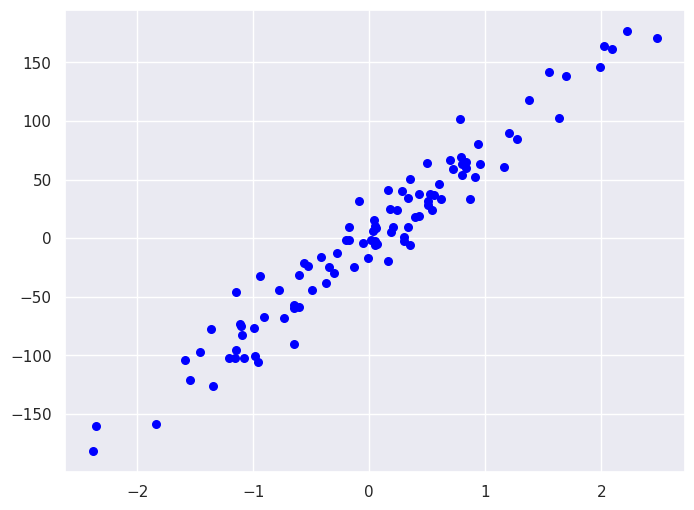

In [83]:
figure = plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], y, color = 'blue', marker = 'o', s = 30)

In [84]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [95]:
class LinearRegression:
    def __init__ (self, learning_rate = 1e-2, epochs = 100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Figures out parameters as per training data
        sample_count, feature_count = X.shape
        
        # Parameter for every feature is initialized as 0
        self.weights = np.zeros(feature_count)
        self.bias = 0
        
        for _ in range(self.epochs):
             
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/sample_count) * np.dot(X.T, (y_predicted - y))
            db = (1/sample_count) * np.sum(y_predicted - y)
        
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    
    def predict(self, X):
        # Uses the calculated parameters to predict the output
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [96]:
def mean_squared_error (y_actual, y_predicted):
    return np.mean((y_actual - y_predicted) ** 2)

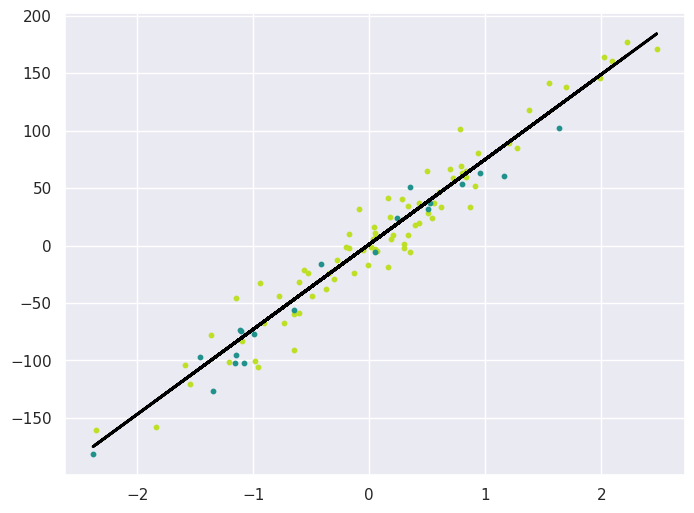

In [118]:
regressor = LinearRegression(learning_rate = 1e-2, epochs = 500)
regressor.fit(X_train, y_train)

predicted = regressor.predict(X)
cmap = plt.get_cmap('viridis')
figure = plt.figure(figsize = (8, 6))
plt.scatter(X_train, y_train, color = cmap(0.9), s = 10)
plt.scatter(X_test, y_test, color = cmap(0.5), s = 10)
plt.plot(X, predicted, color = 'black', linewidth = 2, label = 'Prediction')